<a href="https://colab.research.google.com/github/seonyoungleee/DL_Study/blob/main/DL_study__Do_it!_DL_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Study material: Do it! Deep learning 입문

# **Chapter 2.**
Goal: Run simple functions in numpy, matplotlib in colab environment

1D(1x3), 2D(2x3) list

In [ ]:
my_list = [10, 'hello lost', 20]
print(my_list[1])

hello lost


In [ ]:
my_list_2 = [[10,20,30],[40,50,60]]

In [ ]:
print(my_list_2[1][1])

50


numpy import & check ver.

In [ ]:
import numpy as np
print(np.__version__)

1.19.5


2D array using array()

In [ ]:
my_arr = np.array([[10,20,30],[40,50,60]])
print(my_arr)

[[10 20 30]
 [40 50 60]]


check np array using type(): 
the last line of the code cell prints the result without print()

In [ ]:
type(my_arr)

numpy.ndarray

element in numpy array

In [ ]:
my_arr[0][2]

30

numpy built-in function (faster than 'for statement')

In [ ]:
np.sum(my_arr)

210

draw graph using matplotlib

In [ ]:
import matplotlib.pyplot as plt

draw line plot

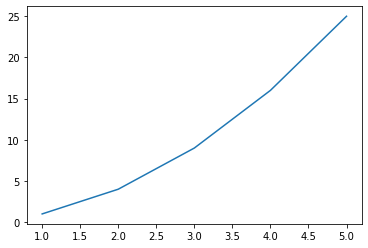

In [ ]:
plt.plot([1,2,3,4,5],[1,4,9,16,25])
plt.show()

draw scatter plot

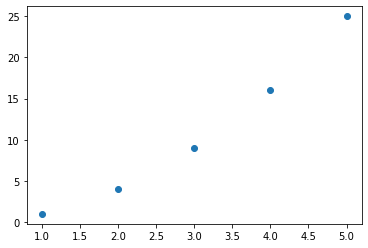

In [ ]:
plt.scatter([1,2,3,4,5],[1,4,9,16,25])
plt.show()

draw scatter plot with numpy array

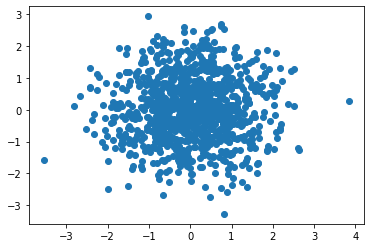

In [ ]:
x = np.random.randn(1000) # 표준 정규 분포를 따르는 난수 1000개 생성
y = np.random.randn(1000) # 표준 정규 분포를 따르는 난수 1000개 생성
plt.scatter(x, y)
plt.show()

# **Chapter 3. Goal: Run linear regression, GD (Gradient descent), loss function**

Goal of linear regression: To find slope a and intercept b

y=ax+b

example: diabetes datasets from sklearn

type of the data diabetes: Bunch class (like python dictionary)

input: data(442x10), output: target(442x1)

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [ ]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [ ]:
diabetes.data[0:3] # 3data * 10features

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [ ]:
diabetes.target[:3] # targets of 3 data

array([151.,  75., 141.])

visualization using matplotlib of the data of diabetes

(with 2 features to draw in 2D space)

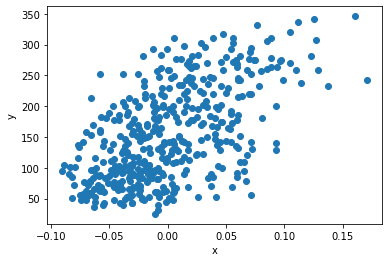

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2], diabetes.target) # x: first, second features of all patients. y: targets of all patients.
plt.xlabel('x')
plt.ylabel('y')
plt.show()

preparation of the training data

In [ ]:
x = diabetes.data[:,2]
y = diabetes.target

example: find w, b

1) set random w, b

2) calculate y hat from random sample from x

3) compare y hat and y

4) update w, b

5) repeat 2-4 using all samples

In [ ]:
w = 1.0
b = 1.0

In [ ]:
y_hat = x[0]*w + b
print(y_hat) # target y: 151

1.0616962065186886


In [ ]:
print(y[0])

151.0


In [ ]:
# update y_hat by changing w value
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [ ]:
# update w (dy_hat / dw)
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)
# w_rate: w rate about x[0]

0.061696206518688734


update w using w_rate

In [ ]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


update b using b_rate

In [ ]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186887


In [ ]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [ ]:
b_new = b + 1
print(b_new)

2.0


disadvantages of above method:

1) if y_hat is too small than y, hard to update w and b value with large scale

2) if y_hat is bigger than y, cannot decrease y_hat

==> Backpropagation is the solution!

[Backpropagation]
by multiplying w_rate by (y hat - y),

1) can update w,b effectively when y_hat is too small than y

2) can update the direction of w, b when y_hat value oversteps y

In [ ]:
# update w with err * rate
# x[0]
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [ ]:
# w_rate = x[1]
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


In [ ]:
# repeat using all sample
for x_i, y_i in zip(x,y): # zip(): gets each element from multi array
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w,b)

587.8654539985689 99.40935564531424


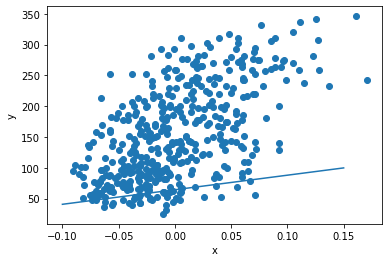

In [ ]:
# draw the model(w,b) to check it fits well on dataset
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * 2 + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# repeat 100 epochs
for i in range(1,100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


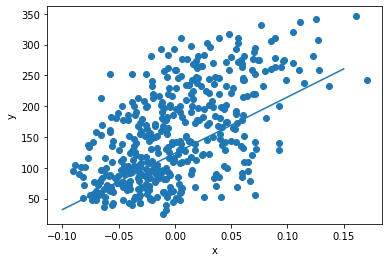

In [ ]:
# draw updated model
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
# y_hat = 913.6x + 123.4

In [ ]:
# predictation with the model
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


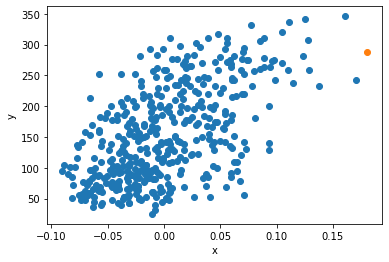

In [ ]:
plt.scatter(x,y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

03-3.  The correlation between loss function and gradient descent

GD: the method to find a point that minimizes the value of loss function

Loss func: diff between predicted value and true value

SE(squared err) = (y-y hat)^2

In [ ]:
# 가중치에 대해 제곱 오차 미분
y_hat = x_i*w + b
err = y_i - y_hat
w_rate = x_i
w = w + w_rate * err # update w

In [ ]:
# 절편에 대해 제곱 오차 미분
err = y_i - y_hat
b = b + 1 * err

03-4.  Neuron for linear regression

In [ ]:
# Make Neuron Class
class Neuron:

  def __init__(self):
    # initialize weight w and bias b
    self.w = 1.0
    self.b = 1.0

  def forpass(self, x):
    # calculate linear equation
    y_hat= x*self.w + self.b
    return y_hat

  def backprop(self, x, err):
    # calculate gradient of w, b
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad

  # func to update w, b
  def fit(self, x, y, epochs=100):
    for i in range(epochs):
      for x_i, y_i in zip(x, y): # repeat with all samples
        y_hat = self.forpass(x_i) # forward
        err = -(y_i - y_hat)
        w_grad, b_grad = self.backprop(x_i, err) # backpropagation
        self.w -= w_grad # update w
        self.b -= b_grad # update b

In [ ]:
neuron = Neuron()
neuron.fit(x, y) # training

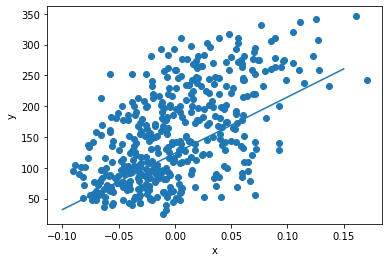

In [ ]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# **Chapter 4. Binary Classification**
- Perceptron: linear function + step function, learns weight from the result of step func
- Adaline(Adaptive Linear Neuron): improved model of perceptron, learns weight from the result of linear func
- Logistic regression: Adaline + activation func

Logistic Loss Function: Cross Entropy
Goal: Find weight and bias to minimize logistic loss function's value by differenciation of logistic loss function

In [ ]:
# 04-4
# load Wisconsin breast cancer dataset from scikit learn (Bunch)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# input check (569 samples, 30 featrues)
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [ ]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

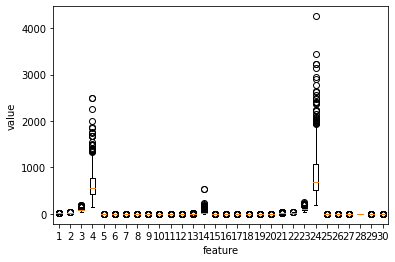

In [ ]:
# draw box plot for checking quartile of each feature
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [ ]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [ ]:
x = cancer.data
y = cancer.target

In [ ]:
# 04-5. make neuron using logistic regression

# divide dataset. training 75% : test 25%
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

In [ ]:
class LogisticNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    # calculate linear equation
    z = np.sum(x*self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z)) # sigmoid
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5

In [ ]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)
np.mean(neuron.predict(x_test) == y_test)

0.8245614035087719

In [ ]:
# 04-6. simgle layer neural network using logistic regression neuron
class SingleLayer:

  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x*self.w) + self.b # calculate linear equation
    return z
  
  def backprop(self, x, err):
    w_grad = x*err # gradient of weight
    b_grad = 1*err # gradient of intercept
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None) # for np.ext() calc
    a = 1 / (1 + np.exp(-z)) # sigmoid
    return a

 # def add_bias(self, x):
 #   return np.c_[np.ones((x.shape[0], 1)), x] # add 1 col vector

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1]) # init weight
    self.b = 0 # init intercept
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) # random index
      for i in indexes:
        z = self.forpass(x[i]) # forward
        a = self.activation(z)
        err = -(y[i]-a) # error
        w_grad, b_grad = self.backprop(x[i], err) #backward
        self.w -= w_grad # update weight
        self.b -= b_grad # update intercept
        a = np.clip(a, 1e-10, 1-1e-10) # clipping & accumulate loss (for log calc)
        loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a)) # save avg loss by every epoch
      self.losses.append(loss/len(y))

  def predict(self, x):
      z = [self.forpass(x_i) for x_i in x] # forward
      return np.array(z) > 0 # apply step func

  def score(self, x, y):
      return np.mean(self.predict(x) == y)

In [ ]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)
# z = np.clip(z, -100, None) 추가하니 해결

0.9298245614035088

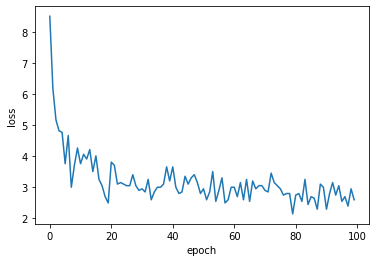

In [ ]:
# loss check
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# loss decreases by epochs

In [ ]:
# 04-7. logistic regression using scikit-learn

from sklearn.linear_model import SGDClassifier

In [ ]:
# loss func: log, min decrease: tol
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [ ]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])